# Introduction to Atoti

This course gives a quick introduction to Atoti Python, a library that allow users to build their own operational intelligence platform for better collaboration and faster analysis.   

<img src="https://data.atoti.io/atoti-academy/images/introduction/0_Atoti_architecture.png" width="750px"/>

We will look at some commonly used functions and operations from the library.  

<u><b>Course Outline and Objectives</b></u>
1. Create Atoti tables via data source or from scratch.
2. Build an Atoti cube.
3. Master common operations such as hierarchy manipulations and measure creations.
4. Explore your data with interactive visualization.
5. Export and share your data to Pandas DataFrame or other data structures.

The notebook is expected to run sequentially as some data objects created at the beginning may be used in later cells.  
Some cells may fail to execute. This is expected as it's intended to demonstrate the erroneous behaviour one may encounter.  

This notebook is broken up into the following sections:  

- [1. Getting Started](#1.-Getting-Started)
	- [1.1 Install Atoti and its plugins](#1.1-Install-Atoti-and-its-plugins)
	- [1.2 Import the Python libraries](#1.2-Import-the-Python-libraries)
- [2. Create an Atoti Session](#2.-Create-an-Atoti-Session)
- [3. Initialize Atoti UI](#3.-Initialize-Atoti-UI)
- [4. Data modeling](#4.-Data-modeling)
	- [4.1 Table structure creation](#4.1-Table-structure-creation)
	- [4.2 Table creation through exploration](#4.2-Table-creation-through-exploration)
		- [4.2.1 Check on data types](#4.2.1-Check-on-data-types)
		- [4.2.2 Delete tables](#4.2.2-Delete-tables)
		- [4.2.3 Table configuration](#4.2.3-Table-configuration)
	- [4.3 Data schema](#4.3-Data-schema)
		- [4.3.1 Identify base table](#4.3.1-Identify-base-table)
		- [4.3.2 Visualize table schema](#4.3.2-Visualize-table-schema)
		- [4.3.3 Table join](#4.3.3-Table-join)
- [5. Loading data into tables](#5.-Load-data-into-tables)
- [6. Atoti Cube](#6.-Atoti-Cube)
	- [6.1 Cube creation](#6.1-Cube-creation)
	- [6.2 Cube attributes](#6.2-Cube-attributes)
		- [6.2.1 Hierarchies and levels](#6.2.1-Hierarchies-and-levels)
		- [6.2.2 Measures](#6.2.2-Measures)
    - [6.3 Cube Housekeeping ](#6.3-Cube-Housekeeping)
        - [6.3.1 Delete unwanted hierarchies, levels and measures](#6.3.1-Delete-unwanted-hierarchies,-levels-and-measures)
        - [6.3.2 Hide technical measures](#6.3.2-Hide-technical-measures)  
        - [6.3.3 Organize measures in folders](#6.3.3-Organize-measures-in-folders)  
- [7. Visualization](#7.-Visualization)
	- [7.1 Build our visualization](#7.1-Build-our-visualization)
		- [7.1.1 Add hierarchies and measures to the visualization](#7.1.1-Add-hierarchies-and-measures-to-the-visualization)
		- [7.1.2 Expandable levels vs multi-level hierarchy](#7.1.2-Expandable-levels-vs-multi-level-hierarchy)
	- [7.2 Change type of visualization](#7.2-Change-type-of-visualization)
	- [7.3 Filter data](#7.3-Filter-data)
		- [7.3.1 Focus on a single trace on charts](#7.3.1-Focus-on-a-single-trace-on-charts)
		- [7.3.2 Filter by member](#7.3.2-Filter-by-member)
		- [7.3.3 Conditional filtering](#7.3.3-Conditional-filtering)
	- [7.4 Publish in app](#7.4-Publish-in-app)
- [8. Output query results](#8.-Output-query-results)
	- [8.1 Export data to CSV](#8.1-Export-data-to-CSV)
	- [8.2 Output query results to Pandas DataFrame](#8.2-Output-query-results-to-Pandas-DataFrame)
	- [8.3 Output query results to other data structure](#8.3-Output-query-results-to-other-data-structure)


<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=introduction-to-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try atoti"></a></div>

# 1. Getting Started

## 1.1 Install Atoti and its plugins

We can use Atoti in a Jupyter notebook or in a Python script. Minimally, we install the atoti library with either of the following:
- `pip install atoti`
- `conda install atoti`

If we want to be able to explore data on the fly with Atoti in JupyterLab, we have to install extra plugin for its JupyterLab extension. Again, run with either `pip` or `conda` as shown below:
- `pip install atoti-jupyterlab`
- `conda install atoti-jupyterlab`  

💡There are other [plugins](https://docs.atoti.io/latest/reference.html#plugins) available for Atoti. For instance, to access CSV or Parquet on AWS S3 bucket, we have to install its corresponding plugin `atoti-aws`. Similarly, `atoti-sql` is required for connectivity to SQL database. Using `pip`, we can install multiple plugins with the `extra` syntax as shown below:    
- `pip install 'atoti[jupyterlab,aws,sql]'`

Since there's no shortcuts for conda, therefore we have to list out the extra plugins we needed:
- `conda install atoti atoti-jupyterlab atoti-aws atoti-sql`

## 1.2 Import the Python libraries

Usually, it is sufficient to import just the Atoti libraries. However, if we would like to perform some pre-computation before using Atoti, we can import `pandas` as well.

In [1]:
import atoti as tt

# 2. Create an Atoti Session

We instantiate an Atoti session in order to establish a connection to the Java gateway of the Atoti Server. 

In [2]:
session = tt.Session()

⚠️ Windows users may encounter the following Windows Security Alert:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/2_window_security_alert.png" width="400px"/>  

This is because Atoti Server, the underlying aggregation engine used by Atoti, is built using Java. The web application, Atoti UI, is built using REACT.  

⚠️ We can have multiple Atoti sessions within a instance, provided that they are given different names. In the above code snippet, we have not set any [parameters for the session](https://docs.atoti.io/latest/api/atoti.Session.html#atoti.Session). If we re-instantiate a session without defining a name for it, the existing session will be deleted and a new session gets created as we will see in the next cell. 

In [3]:
session = tt.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
)

Closing existing "Unnamed" session to create the new one.


💡The above code snippet demonstrate how we configure some of the common parameters for [Atoti deployment](https://docs.atoti.io/latest/deployment/deployment_setup.html#):
- `user_content_storage`: Persists saved dashboards, widgets and filters in the session to a database. A "content" folder in the same directory as this notebook and a H2 database is created. 
- `port`: Sets the port for the Atoti UI.
- `java_options`: Additional options to pass when starting the Java process, e.g. increasing the amount of RAM that the session can use via `-Xmx` option.  

# 3. Initialize Atoti UI

Once the session gets instantiated, Atoti UI will start on a random port unless specified.  

In [4]:
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

⚠️ There is nothing interesting in Atoti UI at this point in time because we have yet to create our data model. We will revisit Atoti UI later on.

# 4. Data modeling 

There are two ways we can create Atoti tables (along with recommendations):  

1. Defining table structure:
   * For **full application implementations**, we recommend that we define the table structure as we can start the application quickly before loading data.  
3. Infer table structure from a datasource:
   * For **data exploration, model prototyping or adhoc reporting with new data source**, creating a table by inferring its structure from a datasource is a quick way to get things moving.  




## 4.1 Table structure creation

Similar to the creation of database tables, we can define the structure of the table by defining:
* `name`: Name of table.
* `types`: Column names and its corresponding data type.
* `keys`: Column(s) used to dictionarize data for faster querying. It is also used to identify unique data rows. Atoti keeps the last uploaded row when there are duplicates.  
* `default_values`: Default value when value is not provided. `"N/A"` by default for category columns, `null` for numerical columns and `1970-01-01` for date columns. If column is used in hierarchy manipulation, e.g. create multi-level hierarchies, a non-empty default value has to be set.

In [5]:
product_tbl = session.create_table(
    name="Products",
    types={
        "ProductId": tt.type.STRING,
        "ProductName": tt.type.STRING,
        "ProductCategory": tt.type.STRING,
        "Supplier": tt.type.STRING,
        "PurchasingPricePerUnit": tt.type.FLOAT,
    },
    keys=["ProductId"],
    # optional. Setting default value to 0 for demonstrative purpose
    default_values={"PurchasingPricePerUnit": 0},
)

product_tbl.head()

,ProductName,ProductCategory,Supplier,PurchasingPricePerUnit
ProductId,,,,


💡Similar to Pandas, we can use `head` function to preview the data in the Atoti table. 

⚠️ An empty table is created. We will load data into the table separately.

## 4.2 Table creation through exploration

Another way to create a table is by using a corresponding connector to consume an existing data source. This is a quick and convenient way to create an Atoti table and especially useful when we want to explore the data quickly.  

We can use `session.read_csv`, for instance, to consume CSV files and `session.read_parquet` for parquet files etc. This way, we need not define the table structure as the table will be created automatically after consuming the data.  

In [6]:
orders_tbl = session.read_csv("s3://data.atoti.io/atoti-academy/data/Orders.csv")
orders_tbl.head()

,OrderId,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
0,1,18/2/2019,650,22.42,Freight United,994,18336,c4411
1,12,18/2/2019,148,5.5,United Package,1384,18336,c2619
2,25,18/2/2019,883,17.57,The Transporter,773,18551,c1723
3,72,18/2/2019,927,27.14,Freight United,1423,63528,c1835
4,74,18/2/2019,651,56.83,Freight United,1059,18680,c5475


💡Data is loaded into the table upon creation. For quick prototyping, we advise using smaller dataset during initial table creation. Data can be **incrementally loaded** into the table later on.   

💡For data sources that are not supported natively by the Python API, we can consume it with either Pandas, Apache PyArrow or Apache Spark DataFrame before loading it into an Atoti table. Check out [`atoti.Session` module](https://docs.atoti.io/latest/api/atoti.Session.html#atoti.Session) or press `tab` on `session.read` to see the available functions:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/4_read_functions.png" />

### 4.2.1 Check on data types

Some data structures such as Pandas DataFrame or parquet files comes with metadata information. In such case, Atoti will be able to inherit the data types of the columns from the sources. Otherwise, the API automatically infers the data type based on the first `1000` records.  

To check the data types of the table columns:

In [7]:
orders_tbl

💡To discover the data type programmatically for a specific column, we can do the following:  

In [8]:
orders_tbl["SellingPricePerUnit"].data_type

'double'

In some cases, it is useful to iterate through the columns and handle the data based on its data type. For instance, we can define measures for numerical columns iteratively.

In [9]:
for col in orders_tbl.columns:
    (
        print(f"{col} is a numerical type column.")
        if orders_tbl[col].data_type
        in [
            "int",
            "double",
            "float",
            "int[]",
            "double[]",
        ]
        else print(f"{col} is a hierarchical type column.")
    )

OrderId is a numerical type column.
OrderDate is a hierarchical type column.
QuantitySold is a numerical type column.
SellingPricePerUnit is a numerical type column.
ShipperName is a hierarchical type column.
ProductId is a numerical type column.
EmployeeId is a numerical type column.
CustomerId is a hierarchical type column.


### 4.2.2 Delete tables

Once a table is created, we cannot re-execute the table creation command to perform updates. Instead, we should delete the table and before re-creating it.  

The tables are stored as a map under the session. Therefore we can access it simply by using the table's name as the key to the map. 

In [10]:
# del session.tables["Orders"]
del session.tables[orders_tbl.name]

💡Alternatively, we can restart the session and re-execute everything after.

### 4.2.3 Table configuration

When we create a table from datasource, we can tweak the table structure as necessary. For instance, we can define key columns to ensure the uniqueness of the data loaded. The key columns are indexed, allowing better search performance.  

In [11]:
orders_tbl = session.read_csv(
    "s3://data.atoti.io/atoti-academy/data/Orders.csv",
    table_name="Orders",
    columns={
        "OrderId": "Order Id",
        "OrderDate": "Order Date",
        "QuantitySold": "Quantity Sold",
        "SellingPricePerUnit": "Selling Price Per Unit",
        "ShipperName": "Shipper Name",
        "ProductId": "Product Id",
    },
    keys=["Order Id", "Product Id"],
    types={
        "Order Id": tt.type.STRING,
        "Product Id": tt.type.STRING,
        "Order Date": tt.type.LOCAL_DATE,
    },
    date_patterns={"Order Date": "dd/M/yyyy"},
    default_values={"Quantity Sold": 0, "Selling Price Per Unit": 0.0},
)

The example above covered some of the parameters that we commonly configure when creating Atoti table from data sources.

**table_name**

When reading from a file source, the table name is defaulted to name of the file without the extension. E.g. for Orders.csv, the table name will be "Orders" unless specified.  

**columns**

This parameter is only available for `read_csv` and `read_parquet`. It allows us to:
1. Rename columns.
2. Select only the required columns from the data source.

After renaming the columns, be aware that the following parameters expect the updated names in the mapping instead of the original column names:
* `keys`
* `types`
* `date_patterns`
* `default_values`

**types**

We can cast the data types for the columns explicitly. The parameter expects a dictionary with the column name as key, mapped to the expected [data type](https://docs.atoti.io/latest/api/atoti.type.html#module-atoti.type). This parameter is however, not available for Parquet and Spark DataFrame. 

**date_patterns**

Defines the date format pattern for the date column if it is not in the `yyyy-MM-dd` format. Check out [Java date patterns](https://docs.oracle.com/en/java/javase/15/docs/api/java.base/java/time/format/DateTimeFormatter.html#patterns):  

<img src="https://data.atoti.io/atoti-academy/images/introduction/4_date_patterns.png" />


## 4.3 Data schema 

Atoti implements a [snowflake schema](https://en.wikipedia.org/wiki/Snowflake_schema). This means that the schema organize data around a central fact table (we call it base table). The other dimension tables joining to the central table can be normalized, i.e. split into multiple related tables, creating a branching structure that resembles a snowflake.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/4_snowflake_schema.png" width="500px" />

### 4.3.1 Identify base table

The base table contains data at the lowest level of granularity, known as "facts" for the cube. It's normally the largest table.  

💡To be able to query an item, it has to be reachable from the base table to the refenced table. Therefore, the base table has to be the most granular.

### 4.3.2 Visualize table schema

The table schema will show us all the tables in the session, along with their columns and their respective data types. It makes it easier for us to identify the column(s) which we want to use for the table join.

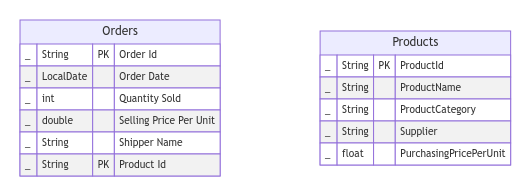

In [12]:
session.tables.schema

In this case, we can see that Product Id is common between the two tables but named differently — `Product Id` in Orders table and `ProductId` in Products table. 

### 4.3.3 Table join

Usually, we can perform a table join without defining the columns used for it if the columns have the same name in both tables: 

`orders_tbl.join(product_tbl)`

Atoti automatically infers the join by columns with the same name. However, because there are no common columns by name between the two tables, we will get a cartesian join between the tables. This may result in wrong results returned in queries and definitely poorer querying performance. Hence, let's define the condition of the join explicitly.  

In [13]:
orders_tbl.join(product_tbl, (orders_tbl["Product Id"] == product_tbl["ProductId"]))

💡It is a good practice to define the condition of the join explicitly, such that any reader will know clearly which columns are they joined by.  

💡We perform the join from the parent table to referenced table, i.e. `orders_tbl → product_tbl`. Similarly, the order of the condition has to be from parent table to referenced table, i.e. `orders_tbl → product_tbl`.  

We can have multiple joins by surrounding each condition with a parenthesis and combine the conditions with the `&` operand:

`a.join(b, (a["col1"] == b["col1"]) & (a["col2"] == b["col2"]))`

### 📐Exercise  

View how the schema changed after the last join.  

### 📖 Solution

`session.tables.schema`

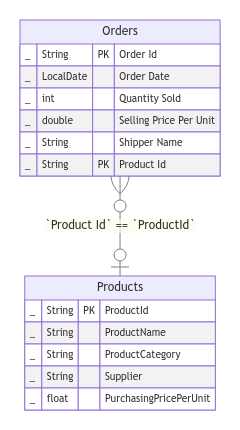

In [14]:
session.tables.schema

# 5. Load data into tables
 
After a table is created, we can load data into the tables using the `load` function corresponding to the data source format. For instance, if the data source is a CSV file, we can use [`load_csv`](https://docs.atoti.io/latest/api/atoti.Table.load_csv.html#atoti.Table.load_csv) to upload the data.  

💡 Check out the [`atoti.table` module](https://docs.atoti.io/latest/api/atoti.Table.html#atoti.Table) or press `tab` on `table.load` to see the available functions:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/5_load_functions.png" />

In [15]:
product_tbl.load_csv("s3://data.atoti.io/atoti-academy/data/Products.csv")
product_tbl.head()

,ProductName,ProductCategory,Supplier,PurchasingPricePerUnit
ProductId,,,,
539,Queso Cabrales,Dairy Products,Cooperativa de Quesos Las Cabras,11.340000
552,Singaporean Hokkien Fried Mee,Grains/Cereals,Leka Trading,8.060000
565,Mozzarella di Giovanni,Dairy Products,Formaggi Fortini s.r.l.,18.770000
578,Tofu,Produce,Mayumis,12.560000
591,Manjimup Dried Apples,Produce,"Gday, Mate",30.530001


For CSV files which doesn't come with metadata information on the data type, we have to take special note on date columns. Atoti recognizes values formatted in `yyyy-MM-dd` as dates. For all other formats, we have to define the pattern with the `date_patterns` parameter as seen in the previous example in the section "4.2.3 Table Configuration".    

💡 Read: [Atoti: Working with dates in Python](https://www.atoti.io/guides/atoti-working-with-dates-in-python/)  

Verify the shape of the table after the data loading. 

In [16]:
print(
    f"Number of rows: {len(product_tbl)}, Number of columns: {len(product_tbl.columns)}"
)

Number of rows: 77, Number of columns: 5


# 6. Atoti Cube

## 6.1 Cube creation

As Atoti follows the [snowflake schema](https://en.wikipedia.org/wiki/Snowflake_schema), we will create the cube with the base table. 

💡We can create new tables and join them to the reference table even after the cube is created. Therefore, it is possible to start the cube with a single table and build the model incrementally afterward.  

In [17]:
cube = session.create_cube(orders_tbl, name="Order Cube")

By default, the cube is created in `auto` mode. This means that non-numerical or key columns are created as single-level hierarchies. A `SUM` and a `MEAN` measure is automatically created for each numerical column.  

Other [available modes](https://docs.atoti.io/latest/api/atoti.Session.create_cube.html#atoti.Session.create_cube) are:
- `manual`: Only `contributors.COUNT` is created. Users have to manually create the hierarchies and measures they require.
- `no_measures`: Similar to `auto` mode, except that measures are not created. This is useful if we have a lot of numerical columns but we do not require the sum and average metrics for all of them.  

💡We can create multiple cubes per session. Just remember to give each of them a different name.

## 6.2 Cube attributes

The main attributes of a cube are:  

* **Dimensions / Hierarchies / Levels**: This is how the data is structured in the cube.  
* **Measures**: They are the numberical data / metrics contained in the cube.

We will look at these in more detail below. 

First, let's take a look at the cube, so see the dimensions, hierarchies, levels and measures.

In [18]:
cube

In the diagram below, you'll find an overview of the relationship between dimensions, hierarchies and levels:

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_cube_attributes.png" width="800px" />

Understanding the hierarchies and levels is important for us to understand how data is being retrieved from the cube. Each level added to the query will help us identify the location of the value that we are targetting:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_location.png" width="800px" />

We can access the attributes individually as well. For instance, let's look at the hierarchies:

In [19]:
cube.measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x13cc9de70>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x13cc23f10>, 'Quantity Sold.SUM': <atoti.measure.Measure object at 0x13cc23d00>, 'Quantity Sold.MEAN': <atoti.measure.Measure object at 0x13cc20700>, 'Selling Price Per Unit.SUM': <atoti.measure.Measure object at 0x13cc20670>, 'Selling Price Per Unit.MEAN': <atoti.measure.Measure object at 0x13cc20760>}

💡 We can manipulate the cube via these attributes. To simplify coding, we will aliase these attributes with the variable h, l and m for hierarchies, levels and measures respectively.  

In [20]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

The equivalent of `cube.measures` is now `m`:

In [21]:
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x13cb8ce20>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x13cc20580>, 'Quantity Sold.SUM': <atoti.measure.Measure object at 0x1725b1090>, 'Quantity Sold.MEAN': <atoti.measure.Measure object at 0x1725b2fe0>, 'Selling Price Per Unit.SUM': <atoti.measure.Measure object at 0x1725b0a00>, 'Selling Price Per Unit.MEAN': <atoti.measure.Measure object at 0x1725b0a60>}

### 6.2.1 Hierarchies and levels

A few key points:

* Each column in the data source can be treated as a level. 
* Hierarchies are logical orderings of these data elements (or levels).
* It is possible that there is only one level in the hierarchy.  This is known as single-level hierarchy.
* Or we might have a parent-child relationship between them. For example in the hierarchy of geographical zones, we might find one level for continents (Europe, Asia, etc.) and a child level for countries (Signapore, China, Malaysia, etc.) Hierarchies can therefore be single-level or multi-level.  

We will look at these in greater detail in this section:  
- [6.2.1.1 Create multi-level hierarchies](#6.2.1.1-Create-multi-level-hierarchies)
- [6.2.1.2 Access levels that exist under more than one hierarchy](#6.2.1.2-Access-levels-that-exist-under-more-than-one-hierarchy)
- [6.2.1.3 Single-level vs multi-level hierarchies](#6.2.1.3-Single-level-vs-multi-level-hierarchies)
    - [6.2.1.3.1 Single-level hierarchies](#6.2.1.3.1-Single-level-hierarchies)
    - [6.2.1.3.2 Multi-level hierarchies](#6.2.1.3.2-Multi-level-hierarchies)
 
💡 By default, hierarchies automatically created in Atoti are single-level.

In [22]:
# we can use either `cube.hierarchies` or its alias `h` to view the hierarchies
h

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x1725b3130>, ('Orders', 'Shipper Name'): <atoti.hierarchy.Hierarchy object at 0x1725b30a0>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x1725b0a60>, ('Orders', 'Order Date'): <atoti.hierarchy.Hierarchy object at 0x1725b2f50>, ('Orders', 'Order Id'): <atoti.hierarchy.Hierarchy object at 0x1725b0ee0>, ('Orders', 'Product Id'): <atoti.hierarchy.Hierarchy object at 0x1725b2fb0>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x13cb8f8b0>}

A few key points:

* The highest level of the tree consists of dimensions, which usually are the table names.  
* The second level of the tree containing a list is the hierarchies.  
* The list under the hierarchy contains the levels under that hierarchy. As we can see, the hierarchies contain 1 level each, indexed by 0.

Since `cube.hierarchies` is a list of hierarchy, we can access a specific hierarchy using its name as a key to the list.

In [23]:
h["Order Date"]

Similarly, we can view the levels either using `cube.levels` or its alias `l`:

In [24]:
l

#### 6.2.1.1 Create multi-level hierarchies

The advantages of having a multi-level hierarchy is that we will be able to control the way the levels are grouped and structured. This will in turn, allow us to determine how users navigate through the data in the cube.  

⚠️ But, we have to be careful with multi-level hierarchies because we might end up with more than one level with the same name. This means that we have to determine the exact path of the location. We will come back to this in the next section.  

<hr/>

##### 6.2.1.1.1 List levels under hierarchy manually

`cube.hierarchies` is a list. We can create new hierarchy simply by adding a new key to the list, i.e. `Product Tree` and assigning it a list of levels in the correct order:

In [25]:
cube.hierarchies["Product Tree"] = [
    product_tbl["ProductCategory"],
    product_tbl["ProductName"],
]

💡 The below snippet will give the same result as the above snippet:  

* `cube.hierarchies["Product Tree"] = [cube.levels["ProductCategory"], cube.levels["ProductName"]]`  

and so will the following snippet which uses the alias:  

* `h["Product Tree"] = [l["ProductCategory"], l["ProductName"]]`  


We can build multi-level hierarchies either by referring to the table column or using a level in the cube.

##### 6.2.1.1.2 Create date bucketing hierarchy with function

If we have the date value broken into different columns containing the data components such as `Year`, `Month` and `Day`, we can create multilevel hierarchy date buckets using the method listed in section 6.2.1.1.1. However, a quicker way is to use the [`create_date_hierarchy`](https://docs.atoti.io/latest/api/atoti.Cube.create_date_hierarchy.html#atoti.Cube.create_date_hierarchy) function that allow us to split a date column into different date components.  

In [26]:
cube.create_date_hierarchy(
    "Date Hierarchy",
    column=orders_tbl["Order Date"],
    levels={"Year": "yyyy", "Month": "MM"},
)
h["Date Hierarchy"] = {
    **h["Date Hierarchy"].levels,
    "Order Date": orders_tbl["Order Date"],
}

In the above example, we created another `Order Date` level that contains the same value as `Order Date` column, instead of creating a `Day` level that contains the day value. We will use the two `Order Date` levels to demonstrate how the same data under different hierarchies may have different behaviour during aggregation.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
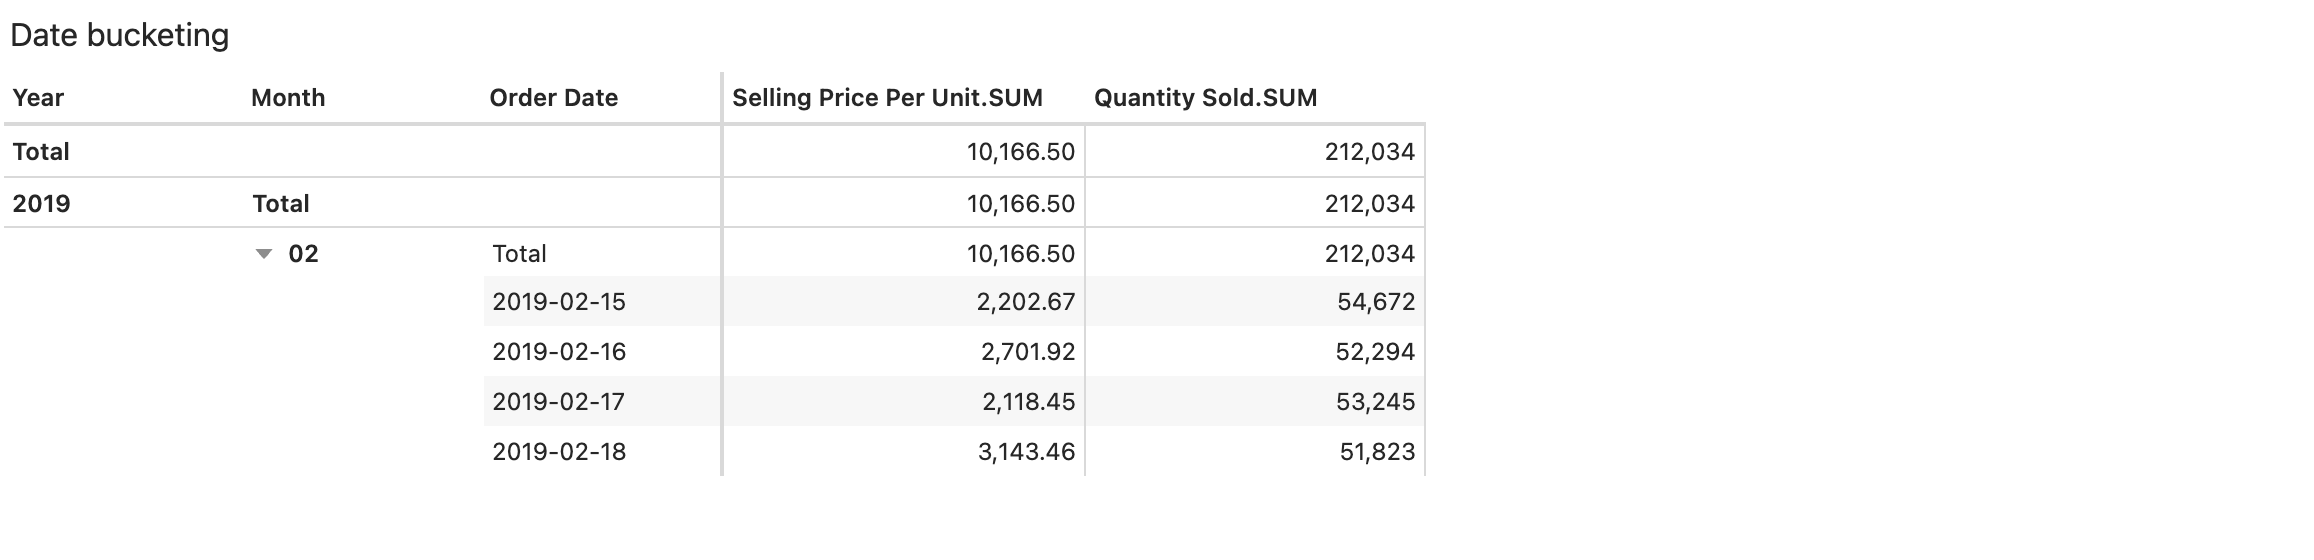

In [27]:
session.widget

#### 📐Exercise  

Review the hierarchies again.

#### 📖 Solution  

`cube.hierarchies` or `h`.

In [28]:
h

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x17260c790>, ('Orders', 'Shipper Name'): <atoti.hierarchy.Hierarchy object at 0x17260c8e0>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x17260c9d0>, ('Orders', 'Order Date'): <atoti.hierarchy.Hierarchy object at 0x1725e7f70>, ('Orders', 'Order Id'): <atoti.hierarchy.Hierarchy object at 0x1725e7f40>, ('Orders', 'Product Id'): <atoti.hierarchy.Hierarchy object at 0x1725e7d00>, ('Orders', 'Date Hierarchy'): <atoti.hierarchy.Hierarchy object at 0x1725e7c40>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x1725e7850>, ('Products', 'Product Tree'): <atoti.hierarchy.Hierarchy object at 0x1725e7640>}

We can see from the tree above, we now have 2 levels with the same name `ProductName` and also another 2 levels with the name `Order Date`.

#### 6.2.1.2 Access levels that exist under more than one hierarchy

When we create a multi-level hierarchy using a column that has an existing level, there are now levels with the same name but under different hierarchies. Therefore, we cannot identify the level using its name as a key.

In [29]:
l["ProductName"]

KeyError: 'An error occurred while calling o1290.findLevelHierarchy.\n: com.activeviam.fwk.ActiveViamRuntimeException: Levels named `ProductName` are present in several hierarchies: [(`Products`, `ProductName`), (`Products`, `Product Tree`)]. Specify the hierarchy name (and the dimension if necessary).\n\tat io.atoti.api.impl.OutsideTransactionApiImpl.findLevelHierarchy(OutsideTransactionApiImpl.java:222)\n\tat java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)\n\tat java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)\n\tat java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)\n\tat java.base/java.lang.reflect.Method.invoke(Unknown Source)\n\tat py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)\n\tat py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)\n\tat py4j.Gateway.invoke(Gateway.java:282)\n\tat py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)\n\tat py4j.commands.CallCommand.execute(CallCommand.java:79)\n\tat py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)\n\tat py4j.ClientServerConnection.run(ClientServerConnection.java:106)\n\tat java.base/java.lang.Thread.run(Unknown Source)\n'

Although the two levels of `ProductName` originated from the same data column, we have go through different hierarchy (sometimes different dimension) to reach each of them. The application will not know from which hierarchy it should access the level from.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_locate_level.png" width="800px" />

As seen in the diagram above, to help us identify the exact level that we are targeting, we should indicate the path to the level as a tuple that comprises of __`(dimension, Hierarchy, level)`__.

In [ ]:
# ProductName under the multi-level hierarchy that we just created
l[("Products", "Product Tree", "ProductName")]

We will see in Section 6.2.2 later on, how understanding the hierarchies and levels will help us in crafting our measure definitions.  

#### 📐Exercise  

Try accessing the other level named `ProductName` under (`Products`, `ProductName`).

#### 📖 Solution

`cube.levels[("Products", "ProductName", "ProductName")]`

or 

`l[("Products", "ProductName", "ProductName")]`

In [ ]:
l[("Products", "ProductName", "ProductName")]

#### 6.2.1.3 Single-level vs multi-level hierarchies

To understand the difference between the two, we are going to jump ahead to visualization to explore the data.  

##### 6.2.1.3.1 Single-level hierarchies  

Let's looks at the data with single-level hierarchies first.  

In [ ]:
session.widget

With single-level hierarchies, we have to add each required levels individually. This gives users the flexibility in the ordering of the levels they want to see. We can easily switch the query order from `ProductName`→`ProductCategory` to the reverse `ProductCategory`→`ProductName` using the Atoti JupyterLab extension on the right:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_Atoti_extension.png" />

💡`contributors.COUNT` returns the number of underlying facts (or rows of data) contributing to the corresponding level. 

##### 6.2.1.3.2 Multi-level hierarchies

In the below table, we added the hierarchy `Product Tree` to the table. The top displayed level is `ProductCategory` and it allows us to drill-down to the `ProductName` level as per the order we defined in our list above. Users cannot insert any levels in between the levels we have defined.

In [ ]:
session.widget

With multi-level hierarchies, the order of querying is pre-defined. It helps users to follow through the relationship of facts.

### 6.2.2 Measures

Measures are numerical data/metrics that are analyzed and compared across dimension in order to gain insights and make informed decisions.  

Below are the measures that are automatically created during cube creation. For each numerical column in the base table, corresponding `MEAN` and `SUM` measures are created. We will have to create measures for referenced table where necessary.   

In [ ]:
cube.measures

Atoti has a range of [aggregation functions](https://docs.atoti.io/latest/api/atoti.agg.html). Let's spend some time to understand measures and what we can do with them:   

- [6.2.2.1 Create measures from table](#6.2.2.1.-Create-measures-from-table)
- [6.2.2.2 Chain up measures](#6.2.2.2-Chain-up-measures)
- [6.2.2.3 Prevent aggregation above a given level](#6.2.2.3-Prevent-aggregation-above-a-given-level)
- [6.2.2.4 Understand measure scope](#6.2.2.4-Understand-measure-scope)
- [6.2.2.5 Format measures](#6.2.2.5-Format-measures)

#### 6.2.2.1 Create measures from table

`cube.measures` is a list of measure. We can create a new measure by adding a new key to the list, e.g. 
- `Selling Price Per Unit`,  
- `PurchasingPricePerUnit`
- `PurchasingPricePerUnit.SUM` 
- `PurchasingPricePerUnit.MEAN` 
in the below examples and formulate their definitions.  

💡 Note that `Selling Price Per Unit.SUM` and `Selling Price Per Unit.MEAN` were automatically created during cube creation.

In [ ]:
# single value
cube.measures["Selling Price Per Unit"] = tt.agg.single_value(
    orders_tbl["Selling Price Per Unit"]
)
# single value
cube.measures["PurchasingPricePerUnit"] = tt.agg.single_value(
    product_tbl["PurchasingPricePerUnit"]
)
# summation
cube.measures["PurchasingPricePerUnit.SUM"] = tt.agg.sum(
    product_tbl["PurchasingPricePerUnit"]
)
# average
cube.measures["PurchasingPricePerUnit.MEAN"] = tt.agg.mean(
    product_tbl["PurchasingPricePerUnit"]
)

💡We can alternatively use the alias `m` instead of `cube.measures` for the above.

`PurchasingPricePerUnit.SUM` and `PurchasingPricePerUnit.MEAN` is similar to the `SUM` and `MEAN` measures that are automatically created by the cube. It aggregates the value along the queried levels. Refer to the type of [aggregation functions](https://docs.atoti.io/latest/api/atoti.agg.html) available from [Atoti documentation](https://docs.atoti.io/latest/index.html).

As for the measures `Selling Price Per Unit` and `PurchasingPricePerUnit` created using `single_value`, we will understand their values through the next few examples.

##### 6.2.2.1.1 Single Values

In [ ]:
session.widget

The `single_value` function will only return a value when all the members on the same level has the same value. In the above visualization, we see only a few products were returned, such as the `ProductName` member "Chai", returned for the "Beverages" product category. This is because the underlying [MDX](https://learn.microsoft.com/en-us/analysis-services/multidimensional-models/mdx/mdx-query-the-basic-query?view=asallproducts-allversions) for querying the cube uses `NON EMPTY`: 

The `NON EMPTY` function returns only set of tuples that are not empty. Therefore, we may have less members being displayed in the visualization than the actual number.

```
SELECT
  NON EMPTY {
    [Measures].[Selling Price Per Unit]
  } ON COLUMNS,
  NON EMPTY Crossjoin(
    Hierarchize(
      Descendants(
        {
          [Products].[ProductCategory].[ALL].[AllMember]
        },
        1,
        SELF_AND_BEFORE
      )
    ),
    Hierarchize(
      Descendants(
        {
          [Products].[ProductName].[ALL].[AllMember]
        },
        1,
        SELF_AND_BEFORE
      )
    )
  ) ON ROWS
  FROM [Order Cube]
  CELL PROPERTIES VALUE, FORMATTED_VALUE, BACK_COLOR, FORE_COLOR, FONT_FLAGS
```

💡 A good way to verify if we are missing any members that you shouldn't is to include measures that we know will not be empty:

1. Add `contributors.COUNT` measure to the query as it returns the number of underlying facts for each member.
2. Add the summation e.g. `Selling Price Per Unit.SUM` for the intended measure as it will return the summation of the value if it exists.  

In [ ]:
session.widget

Let's try to understand why `Selling Price Per Unit` is not returning any value while its corresponding summation/mean has value.  

In [ ]:
session.tables.schema

From the cube schema, we can see that the keys `Order Id` and `Product Id` will help us identify unique rows within the table. Since `single_value` only returns a value when all the members have the same value, let's use the keys to investigate the underlying values.  

From the previous visualization, we add `Order Id` to the query. We can skip `Product Id` since each (`ProductCategory`, `ProductName`) tuple has a unique `ProductId`.

In [ ]:
session.widget

**Single value**: We can see from the table above that the `Selling Price Per Unit` for each order under the `ProductName` is different, i.e. the same product sells at different prices in different orders. Hence, the single-value measure `Selling Price Per Unit` is empty for the `ProductName` level.  

**Summation**: In most cases, we cannot use the summation `Selling Price Per Unit.SUM` at the subtotal level, e.g.:
- Total profit = (Selling price - Unit Price) x Quantity Sold  

**Average**: `Selling Price Per Unit.MEAN` is a good alternative to the single value if we just want the average and not the precise amount.

<hr />

💡 Instead of referring to the table keys, we can also perform a drillthrough on the measure to perform our investigation. 
Drillthrough allows us to see the underlying data and understand that the `Selling Price Per Unit` is different for product in different orders.

In [ ]:
session.widget

In the later section, we will see how we can chain up measures such as the single-values to achieve our business metrics.  

#### 6.2.2.2 Chain up measures

We can implement a formula by chaining up measures. E.g. suppose we want to compute the profit per unit:  

$ProfitPerUnit = SellingPricePerUnit - PurchasePricePerUnit$  

Below is how we formulate it in Atoti:

In [ ]:
m["_ProfitPerUnit (sv)"] = m["Selling Price Per Unit"] - m["PurchasingPricePerUnit"]
m["_ProfitPerUnit (sum)"] = (
    m["Selling Price Per Unit.SUM"] - m["PurchasingPricePerUnit.SUM"]
)
m["_ProfitPerUnit (mean)"] = (
    m["Selling Price Per Unit.MEAN"] - m["PurchasingPricePerUnit.MEAN"]
)

At the `Order Id` level, we get the same value for all 3 measures. However, we get different values for each of them at the sub-total and grandtotal levels. So, which is the correct measure we should use?

In [ ]:
session.widget

It all depends on what KPI we want to achieve:  
- `_ProfitPerUnit (mean)` makes the most sense as it gives us the average profit per unit for the product across the orders.  
- `_ProfitPerUnit (sv)` makes no sense as `Selling Price Per Unit` is empty at the `ProductName` level, hence the difference is the `PurchasingPricePerUnit` itself.  
- Although `_ProfitPerUnit (sum)` is computed correctly, the value itself does not give any useful insights.  

Let's correct the computation of `_ProfitPerUnit (sv)` first in the next section before continuing with our measure creations.  

#### 6.2.2.3 Prevent aggregation above a given level

With respect to our dataset, it is possible that `Selling Price Per Unit` is empty at the `ProductName` level.  

The most logical fix we have in this case, is to prevent the computation of the measure at the sub-total or grandtotal levels, which in this case, are ProductName and ProductCategory levels. This is the same as saying that we want to prevent aggregation of the measures for any levels above the `Order Id` level.  

We achieve this by simply checking if the `Order Id` level is available. We only return the measure value if `Order Id` is available. Otherwise, it's empty.  

In [ ]:
m["ProfitPerUnit (sv)"] = tt.where(
    l["Order Id"].isnull(), m["Selling Price Per Unit"] - m["PurchasingPricePerUnit"]
)

In [ ]:
session.widget

When it comes to designing a __User Defined Function (UDF)__ in the cube, the above illustrates a key principle of Atoti's on the fly computation capability. We can define if data should be aggregated depending on the presence of a queried level.  

In the example above, there is no value for `Order Id` where we have the summarized levels of `ProductName` and `ProductCategory`.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_order_of_query.png" width="950px"/>  

In order of querying, we say that `ProductCategory` and `ProductName` are __above__ `Order Id`.  

We shifted `Order Id` in the below visualization to be above the `ProductCategory` and `ProductName`. Now, we can see that we are only missing the value of `ProfitPerUnit (sv)` at the grandtotal level. This is because that's the only level that doesn't have the `Order Id` value.

In [ ]:
session.widget

Similarly, by switching the `Product Tree` hierarchy to columns instead of rows, we see that the grandtotal value is missing for `_ProfitPerUnit (sv)`. Again, it's for the same reason: `Order Id` is empty and according to our measure definition, nothing is returned.  

In [ ]:
session.widget

With __aggregation on the fly__ capability, we are able to control the behavior of our measures depending on:  

* What is being queried.
* How measures are ordered in the query. 

#### 6.2.2.4 Understand measure scope

Let's recap on what we have learnt so far on measure definitions:  

* It can minimally contain a constant value or simply a formula, for example:

```python
m["_ProfitPerUnit"] = m["Selling Price Per Unit"] - m["PurchasingPricePerUnit"]
```

* Otherwise, it may contain functions such as the `where` condition we saw previously:  

```python
m["ProfitPerUnit"] = tt.where(
    l["Order Id"].isnull(), m["Selling Price Per Unit"] - m["PurchasingPricePerUnit"]
)
```

In this section, we will see how we can further control the behavior of measures with the use of [`scope`](https://docs.atoti.io/latest/api/atoti.scope.html) and why we need such controls.

We have three types of scopes:
- [Origin scope](https://docs.atoti.io/latest/api/atoti.OriginScope.html#atoti.OriginScope): To start aggregation from the specified levels. 
- [Cumulative scope](https://docs.atoti.io/latest/api/atoti.CumulativeScope.html): Used when we want to perform a cumulative aggregation e.g. running total.
- [Sibling scope](https://docs.atoti.io/latest/api/atoti.SiblingsScope.html): To perform aggregation with values from members within the same level. Suitable for achieving non-linear aggregation.

##### 6.2.2.4.1 Origin scope

Given that the formula to compute sales is:

$$ Profit = \sum (ProfitPerUnit \times QuantitySold) $$

We can see there are actually two parts to the above formula:

1. We multiply the `ProfitPerUnit` by `Quantity Sold`.
2. We take the sum of the above multiplication.
 

__Applying formula without aggregation__

Let's define the first part of the `Sales` measure by taking the multiple between the unit selling price and the quantity sold. 

In [ ]:
m["Profit"] = m["_ProfitPerUnit (sum)"] * m["Quantity Sold.SUM"]

In [ ]:
session.widget

With the measure definition above, we see that at every level, including the total levels, Atoti applies the formula of `m["_ProfitPerUnit (sum)"] * m["Quantity Sold.SUM"]`.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_incorrect_aggregation.png"/>  

Therefore, our sales at the total level for the product "Guaraná Fantástica" is `2,715.72` (result of 2.12 * 1,281). It should instead, be the summation of the sales for Order Id `338` and `352`, which equals to `1,091.29`.

__Applying aggregation to formula__  

Let's work on the second part of the `Profit` measure — the aggregation; Atoti offers a range of [aggregation functions](https://docs.atoti.io/latest/api/atoti.agg.html) such as `long`, `short`, `min`, `max`, `prod`, `std` etc.  

1. As per our formula, we will use the summation function [`tt.agg.sum`](https://docs.atoti.io/latest/api/atoti.agg.sum.html#atoti.agg.sum) to sum up the profit:  

    `atoti.agg.sum(operand: NonConstantMeasureConvertible, /, *, scope: Scope) → MeasureDescription`

2. We know that at `Order Id` level, we want to apply the multiplication between `m["_ProfitPerUnit (sum)"]` and `m["Quantity Sold.SUM"]`. Thereafter, we want to sum up the multiplication. Therefore, the scope `OriginScope` comes into play. It defines the level(s) from which we will start the aggregation.

In our case, we will __start aggregating above the `Order Id` level__.

In [ ]:
m["Aggregated Profit"] = tt.agg.sum(
    m["Profit"], scope=tt.OriginScope(levels={l["Order Id"]})
)

In [ ]:
session.widget

We can see that `Aggregated Profit` now has different behavior above the `Order Id` level. We get the correct computation of the profit value.  

__Quick summary:__  

By applying scope on `Order Id`, it means:  
- For the queried level `Order Id` and whatever levels added after `Order Id`, the formula `m["_ProfitPerUnit (sum)"] * m["Quantity Sold.SUM"]` will be applied. 
- For any levels that were queried above the `Order Id` level, it will be the sum of the members of the level below.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_measure_scope.png" width="800px"/>

##### 📐Exercise  

$$ Sales = \sum (SellingPricePerUnit \times QuantitySold) $$

Given the above formula, create the following measures:
- `Sales (sum)`, which uses the measure `Selling Price Per Unit.SUM` to multiply with `Quantity Sold.SUM`.
- `Aggregated Sales (sum)`, which aggregates `Sales (sum)` against the scope `Order Id`.
- `Sales (sv)`, which uses the measure `Selling Price Per Unit` to multiply with `Quantity Sold.SUM`.
- `Aggregated Sales (sv)`, which aggregates `Sales (sv)` against the scope `Order Id`.

##### 📖 Solution  

```python
m["Sales (sum)"] = m["Selling Price Per Unit.SUM"] * m["Quantity Sold.SUM"]
m["Aggregated Sales (sum)"] = tt.agg.sum(
    m["Sales (sum)"], scope=tt.OriginScope(levels={l["Order Id"]})
)

m["Sales (sv)"] = m["Selling Price Per Unit"] * m["Quantity Sold.SUM"]
m["Aggregated Sales (sv)"] = tt.agg.sum(
    m["Sales (sv)"], scope=tt.OriginScope(levels={l["Order Id"]})
)
```

__Difference between SUM vs Single-value measure__

💡 `Selling Price Per Unit.SUM` gives us incorrect value at the total levels. Mathematically speaking, we cannot sum the unit selling price to achieve what we wanted. As a result, the `Sales (sum)` measure gives an incorrect total value when we multiplies the unit selling price with the quantity sold. This can be prevented by using the single value measure `Selling Price Per Unit` (refer to [6.2.2.2 Create measures from table](#6.2.2.1-Create-measures-from-table)).   

By using the single value measure, we see that the `Selling Price Per Unit` is only available at the total level if all its member has the same value (e.g. for "Chai" and "Côte de Blaye"). In the case of "Guaraná Fantástica", its selling price varies between orders. Therefore, value is only displayed at the `Order Id` level. Sales total is empty in this case as the selling price is not available at the total level.  

__However, do note that after applying aggregation with the correct scope, both returns the correct aggregated sales value. The interim `Sales` value is usually important when users want to investigate and understand the final values they see.__

In [ ]:
m["Sales (sum)"] = m["Selling Price Per Unit.SUM"] * m["Quantity Sold.SUM"]
m["Aggregated Sales (sum)"] = tt.agg.sum(
    m["Sales (sum)"], scope=tt.OriginScope(levels={l["Order Id"]})
)

m["Sales (sv)"] = m["Selling Price Per Unit"] * m["Quantity Sold.SUM"]
m["Aggregated Sales (sv)"] = tt.agg.sum(
    m["Sales (sv)"], scope=tt.OriginScope(levels={l["Order Id"]})
)

In [ ]:
session.widget

__Alternative aggregation function__

💡 Instead of chaining up two measures, we can also make use of the aggregation function [`sum_product`](https://docs.atoti.io/latest/api/atoti.agg.sum_product.html).

In [ ]:
m["ProdSum Proft"] = tt.agg.sum_product(
    m["_ProfitPerUnit (sum)"],
    m["Quantity Sold.SUM"],
    scope=tt.OriginScope(levels={l["Order Id"]}),
)

In [ ]:
session.widget

##### 📐Exercise  

The key value of multidimensional analysis to the ability to gather insights from different perspective. In the below visualization, expand on `Shipper Name` level and verify the correctness of the `Aggregated Profit` value.  

In [ ]:
session.widget

##### 📖 Solution  

The value `Profit` is computed correctly at the most granular level, which is the `Order Id` in this case. Since we are performing summation for any levels above `Order Id` as defined using the `OriginScope`, we are able to achieve the total sales by "Shipper Name".  

Again, this demonstrates the aggregation on the fly capability of Atoti. Regardless of the levels that we are querying, we will sum up the `Profit` value from the most underlying `Order Id` level at query time.  

##### 6.2.2.4.2 Cumulative Scope

In data analytics, it is common to compute running totals. In Atoti, we make use of [`CumulativeScope`](https://docs.atoti.io/latest/api/atoti.CumulativeScope.html) to achieve cumulative aggregations, or running totals:

Let's see how we can get the running total across the `Order Date`.

In [ ]:
m["Cumulative Profit"] = tt.agg.sum(
    m["Aggregated Profit"],
    scope=tt.CumulativeScope(level=l[("Orders", "Date Hierarchy", "Order Date")]),
)

In [ ]:
session.widget

We can verify that the `Cumulative Profit` measure is indeed cumulating the value of the `Aggregated Profit` measure:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_cumulative_totals.png"/>

Now, let's load data from another month to see what happens to our running total:

In [ ]:
orders_tbl.load_csv(
    "s3://data.atoti.io/atoti-academy/data/Orders-adhoc.csv",
    columns={
        "OrderId": "Order Id",
        "OrderDate": "Order Date",
        "QuantitySold": "Quantity Sold",
        "SellingPricePerUnit": "Selling Price Per Unit",
        "ShipperName": "Shipper Name",
        "ProductId": "Product Id",
    },
    date_patterns={"Order Date": "dd/M/yyyy"},
)

Working with cumulative on multi-level hierarchies, we get our bucketed cumulative values.  

We can see that the running total starts from the first order date `2019-02-15` and continues until the last date on `2019-03-18`. By collapsing the `Order Date` level from the `Month` level, we get a monthly cumulative total. In a similar manner, we also obtained our yearly cumulative total.  

In [ ]:
session.widget

__Reset cumulative total__  

We can reset the cumulative total for a certain level by using the `partitioning` parameter of the `CumulativeScope` function. Let's update the definition of our `Cumulative Profit` measure.  

In [ ]:
m["Cumulative Profit"] = tt.agg.sum(
    m["Aggregated Profit"],
    scope=tt.CumulativeScope(
        level=l[("Orders", "Date Hierarchy", "Order Date")], partitioning=l["Year"]
    ),
)

In [ ]:
session.widget

⚠️ We cumulate the `Aggregated Profit` along the level identified by `l[("Orders", "Date Hierarchy", "Order Date")]`. As explained in earlier sections, even though both `l[("Orders", "Date Hierarchy", "Order Date")]` and `l[("Orders", "Order Date", "Order Date")]` originates from the same data column, they are treated as two different levels. Therefore, the measure definition for `Cumulative Profit` does not applies to the `l[("Orders", "Order Date", "Order Date")]` level. 

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_date_path.png" />

Without a surprise, we will not have any values for `Cumulative Profit` when we query it along the `l[("Orders", "Order Date", "Order Date")]` as shown below:

In [ ]:
session.widget

Create a separate measure to accumulate along the `l[("Orders", "Order Date", "Order Date")]` if necessary.  

##### 6.2.2.4.3 Sibling Scope

There are times when we want to perform aggregation with members of the same levels. Members of the same level are referred to as siblings, as they have the same parent level. In such cases, we will use [`SiblingScope`](https://docs.atoti.io/latest/api/atoti.SiblingsScope.html) to do so.  

Unlike the other two scope functions, `SiblingScope` works on hierarchies. In the below example, we look at the maximum profit within each level in the `Date Hierarchy`.  

In [ ]:
m["Max profit"] = tt.agg.max(
    m["Aggregated Profit"], scope=tt.SiblingsScope(hierarchy=h["Date Hierarchy"])
)

In [ ]:
session.widget

A few key points:

* At the `Order Date` level: We see that the maximum profit in Feb 2019 is `548,588.54` across the 4 dates. Likewise, in Mar 2019, the maximum sales is `548,588.54`.  
* At the `Month` level: Comparing Feb and Mar in 2019, Feb has the higher profit value of `1,814,408.23`.  
* At the `Year` level: Comparing the profit of 2019 and 2020, 2019 has the higher profit value of `3,616,995.21`.  

At the grand total level, it displays the total profit value across `2019` and `2020`.

##### 6.2.2.4.4 Multidimensional Aggregations & Scope

Let's explore another use case where scope is extremely useful when we have different aggregation behavior for the same measure, along different dimensions. We will compute the historical average of sales profit where it is:  

1. Sum of profits across products which we have previously computed `m["Aggregated Profit"]`.
2. Average across dates.

The formula looks like this:  

$$\frac{\sum AggregatedProfit_{Products}}{DateCount}\$$

In the below cell, we explore the [`atoti.agg.mean`](https://docs.atoti.io/latest/api/atoti.agg.mean.html#atoti-agg-mean) function across the two `Order Date` levels to see what happens.

In [ ]:
# "Order Date" hierarchy
m["Average Daily Profit (od)"] = tt.agg.mean(
    m["Aggregated Profit"],
    scope=tt.OriginScope(levels={l[("Orders", "Order Date", "Order Date")]}),
)

# "Date Hierarchy" hierarchy
m["Average Daily Profit (dh)"] = tt.agg.mean(
    m["Aggregated Profit"],
    scope=tt.OriginScope(levels={l[("Orders", "Date Hierarchy", "Order Date")]}),
)

In fact, the average daily profit gives the same results regardless of which `Order Date` level is indicated in the scope. This is because for any levels that we queried, it will take the average of the profit value at `Order Date` level and apply the average for the level above.  

In [ ]:
session.widget

In the above visualization, we have summation for the `Order Id` level. However, for the levels above `Order Id`, i.e. `Order Date` and `ProductName`, we have the mean aggregations. This may get confusing for some end-users.  

A better way to represent our Pivot table when we have different aggregations across different dimensions is to have consistent aggregation on columns and rows where possible. In the visualization below, we sum up the Profits across the `Order Id` for each product (column-wise); and we take the average of the profit across the dates (row-wise).  

In [ ]:
session.widget

By toggling the view to have the `Order Date` on the columns, we can see that there are missing data points on the timeline. Now, the `mean` function takes the average over the number of members, which means that it only considers the days where there are orders accounted for. However, in our case, we needed the profit to be divided by the total number of days within the given period.  

Let's see how we manage aggregation over sparse data in such cases. 

##### 6.2.2.4.2 Managing total counts over sparse data

Sometimes, it's all about creativity. There are many ways to chain up different measures to achieve the results we wanted, for example:

1. Count the number of days. Then we divide profit by the total number of days.  
2. We force a value, e.g. 0, for each day in the period and take the mean of the profit.   

__1. Profit / Day count method__

Let's look at how we can achieve the first method.  

By making use of the aggregate function [`atoti.agg.count_distinct`](https://docs.atoti.io/latest/api/atoti.agg.count_distinct.html#atoti-agg-count-distinct), we can count the number of distinct days in the queried levels.  

In [ ]:
m["Total Days"] = tt.agg.count_distinct(orders_tbl["Order Date"])

However, what we want is the distinct date count across all the levels, which is the grand total of our `distinct_count` measure. Therefore, we make use of the function [`atoti.total`](https://docs.atoti.io/latest/api/atoti.total.html#atoti-total) to apply the grand total value to the level below, i.e. the `ProductName` level.   

However, some products may not be sold on a given day. So, when we query these products, the days counted will be lesser than the span of days we are looking at across all products. What we want is in fact, the number of distinct dates where we have at least an order placed, regardless of the products. If we look at a product level, we would count less days these products, compared to the actual number of days, counted across all products. Here, what we want is the distinct date count across all the levels, which is the grand total of our distinct_count measure.

In [ ]:
m["Total Day Count"] = tt.total(m["Total Days"], h["ProductName"])

Finally, we divide the profit over the total day count.  

In [ ]:
# average daily profit computed using the day count method
m["Average Daily Profit (dc)"] = m["Aggregated Profit"] / m["Total Day Count"]

In [ ]:
session.widget

This method works even when we use the multi-level `Date Hierarchy` to look at the average monthly or yearly profit.  

In [ ]:
session.widget

__2. Force zero value for days without orders__  

In this method, we will make use of the property of [`atoti.CumulativeScope`](https://docs.atoti.io/latest/api/atoti.CumulativeScope.html#atoti-cumulativescope) to ensure there is a value for all members of the level. We will build a few measures to show the property of the `dense` and `window` parameters from the `atoti.CumulativeScope` function.

Previously, we learned how we can use `atoti.CumulativeScope` to compute running total. The function has a `dense` parameter which generate values for all the members of the level. For members with no underlying values, it will repeat the value of the previous member.

In [ ]:
m["Cumulative profit (dense)"] = tt.agg.sum(
    m["Aggregated Profit"],
    scope=tt.CumulativeScope(
        level=l[("Orders", "Order Date", "Order Date")], dense=True
    ),
)

In [ ]:
session.widget

While we want to ensure there is value for each member, we do not actually want it to accumulate. Therefore, we are going to make use of the `window` parameter to limit the number of members to accumulate to 0, i.e. only aggregate its own value. Therefore, a value of 0 will be returned when there is no value.  

In [ ]:
m["Cumulative profit (dense winSize 0)"] = tt.agg.sum(
    m["Aggregated Profit"],
    scope=tt.CumulativeScope(
        level=l[("Orders", "Order Date", "Order Date")], dense=True, window=range(0, 0)
    ),
)

In [ ]:
session.widget

Now, we can compute our daily average profit using the `atoti.agg.mean` function.  

In [ ]:
# average daily profit computed using the cumulative function
m["Average Daily Profit (cumulative)"] = tt.agg.mean(
    m["Cumulative profit (dense winSize 0)"],
    scope=tt.OriginScope(levels={l[("Orders", "Order Date", "Order Date")]}),
)

In [ ]:
session.widget

The drawback of this method is that the computation will not work for bucketed daily average along the `Date Hierarchy`. It currently accumulates along the `Date Order` level under the `Date Order` hierarchy; and not under the `Date Hierarchy` hierarchy.  

As we can see from the results below, the value for `Average Daily Profit (cumulative)` is incorrect. We will have to create a separate measure along the `Date Order` level under the `Date Hierarchy` hierarchy. 

In [ ]:
session.widget

#### 6.2.2.5 Format measures

We can apply formatting for the **display** of our measures in the returned query results. Note that aggregations performed on the measure will still use its unformatted value for the computation. 

In [ ]:
m["Aggregated Profit"].formatter = "DOUBLE[$#,##0.00]"

In [ ]:
session.widget

💡 Refer to Atoti documentation for other [formatting syntax](https://docs.atoti.io/latest/api/atoti.Measure.formatter.html#atoti-measure-formatter).

## 6.3 Cube Housekeeping

There are a few ways to maintaining and looking after your cube:  
- [Delete unwanted hierarchies, levels and measures](#6.3.1-Delete-unwanted-hierarchies,-levels-and-measures)
- [Hide technical measures](#6.3.2-Hide-technical-measures)  
- [Keep measures organized in folders](#6.3.3-Keep-measures-organized-in-folders)  


### 6.3.1 Delete unwanted hierarchies, levels and measures  

Let's recall that a cube has three type of attributes: hierarchies, levels and measures. This section looks at how we can delete these attributes:   

- [6.3.1.1 Delete hierarchies](#6.3.1.1-Delete-hierarchies)
- [6.3.1.2 Delete levels](#6.3.1.2-Delete-levels)
- [6.3.1.3 Delete measures](#6.3.1.3-Delete-measures)

#### 6.3.1.1 Delete hierarchies

Previously, we have created a multi-level hierarchy called `Product Tree` which comprises of the levels `ProductCategory` and `ProductName`.  

Whenever, we add the hierarchy `Product Tree` to our query, `ProductCategory` is displayed. Therefore, we can actually delete the single hierarchy `ProductCategory` since it's no longer required.  

When the hierarchy is deleted, the underlying levels will also be removed.  

#### 6.3.1.2 Delete levels

We can delete levels in the same way as we delete the hierarchy. However, if there is more than 1 level with the same name, we have to define the full path to the level: 

##### **💡Update existing hierarchy**  

Since we still want our multi-level hierarchy, let's update it back to its original state:

#### 6.3.1.3 Delete measures

As with hierarchies and levels, we use `del` command to delete measures.  

In [ ]:
m

### 6.3.2 Hide technical measures

In section [6.2.2.1.2 Chaining up measures](#6.2.2.1.2-Chaining-up-measures), we saw how we can create a measure using other measures. Some of the interim measures, also known as technical measures, are of little interest to end users.  

We cannot delete these measures as they are required for the aggregation. Instead, we can hide them from the view of end users to avoid cluttering and confusion.

In [ ]:
m["_ProfitPerUnit (mean)"].visible = False
m["_ProfitPerUnit (sum)"].visible = False
m["_ProfitPerUnit (sv)"].visible = False

In [ ]:
session.widget

Select the widget cell above and verify that the measures with name starting with `_ProfitPerUnit` is no longer displayed in the content editor:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_hide_measures.png" width="500px"/>

It is also not displayed when we view the `cube.measures`.

In [ ]:
m

### 6.3.3 Organize measures in folders

Folders helps to keep the measures organized. We can expand the relevant folders to access the measures or perform a search to find the intended measure quickly:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/6_verify_folder.gif" width="500px" />  

In [ ]:
m["Selling Price Per Unit"].folder = "Unit Price"

Let's assign the measures with the substring "Unit" in its name to the "Unit Price" folder.

In [ ]:
for _m_name in m:
    if "Unit" in m[_m_name].name:
        m[_m_name].folder = "Unit Price"

### 📐Exercise  

Try accessing the measure `Selling Price Per Unit` from the content editor.  

### 📖 Solution  

Get started with and follow the gif at the beginning of section [6.3.3](#6.3.3-Keep-measures-organized-in-folders):  

`session.widget`

In [ ]:
session.widget

# 7. Visualization

As we have seen with in earlier sections, we can use `session.widget` to explore data interactively. In this section, we will see quickly how we use the Atoti's JupyterLab extension to interact with the data.  

## 7.1 Build our visualization

### 7.1.1 Add hierarchies and measures to the visualization

When we execute `session.widget()`, the widget will display an empty Pivot table by default. The custom JupyterLab extension for Atoti will be expanded. Expanding the panel will automatically adjust the view of cube attributes and the widget's attribute into two panels, allowing greater visibility. 

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-visualization.gif" />  

Clicking on a measure automatically adds it to the visualization as column. Clicking on a hierarchy automatically adds it to the row. Alternatively, drag and drop hierarchies or to move the tiles between rows and columns.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-drag-and-drop.gif" />

### 📐Exercise  

Try building your own Pivot table and shift the measures and hierarchies between rows and columns to see how your visualization changes.  

### 📖 Solution  

Get started with:  

`session.widget`

### 7.1.2 Expandable levels vs multi-level hierarchy

__Expanded display by adding hierarchies to rows__  

When we add hierarchies to rows/columns, all the levels are displayed with the corresponding measures.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-expanded.gif" />  

__Collapsible levels by dropping hierarchies into Pivot table__  

Drag and drop a level on a member of the column on the pivot table to expand on:   

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-collapsible.gif" />  

We can replace the expanded level with another level simply by dropping the new level on member of the parent level.  

__Naturally collapsible levels with multilevel hierarchies__

For multilevel hierarchy, adding the top level of the hierarchy will have the same collapsible effect for the underlying levels.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-multilevel-hierarchies.gif" />  



## 7.2 Change type of visualization

We can easily toggle the type of visualization using the drop-down menu in the Atoti's JupyterLab extension.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-change_type.gif" />  

Adjust the hierarchies and measures interactively to obtain the best-fitting visualization. 

### 📐Exercise  

Using the visualization from the previous exercise, explore the type of visualizations interactively.  

## 7.3 Filter data

### 7.3.1 Focus on a single trace on charts

Atoti uses [Plotly charts](https://plotly.com/python/basic-charts/). Therefore, you can see that we can zoom in on the chart and also (de)select a single trace the same way we do with Plotly.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-deselect-trace.gif" />

### 7.3.2 Filter by member

One of the wonder of Atoti is in its ability to slice and dice the cube. 

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-slice-dice.png" />  

We can view a subset of the data using the widget filter in Atoti's JupyterLab extension:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-widget_filter.gif" />  


### 7.3.3 Conditional filtering 

We can apply conditional filtering by toggling to "Advanced" mode in the widget filter's pop up:  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-advanced-filter.gif" />  

The GIF above shows how we can obtain the daily profit of the top 5 product categories having the highest profit.

### 📐Exercise  

In the visualization below, apply advanced filter such that we get the bottom 10 products with the lowest profit.  

💡 Right-click on the chart to access the context menu. Try sorting the chart by profit.  

In [ ]:
session.widget

### 📖 Solution  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-advanced-filter-solution.gif">  

## 7.4 Publish in app  

During our data exploration, we might want to save some of our investigations and put them in a dashboard for end-users to reference. To do so, we can publish the visualizations that we create in the notebook to Atoti UI application using the `Publish in App` menu.  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-publish-in-app.gif" />

💡 We can access Atoti UI using `session.link`.

In [ ]:
session.link

# 8. Output query results

## 8.1 Export data to CSV
We can export underlying data from the Atoti widgets. Simply right-click on the visualization and click on "Export to CSV".  

<img src="https://data.atoti.io/atoti-academy/images/introduction/7-atoti-export-to-csv.gif" />

## 8.2 Output query results to Pandas DataFrame

We can perform a [cube query](https://docs.atoti.io/latest/api/atoti_query.QueryCube.query.html#atoti-query-querycube-query) and it will return a Pandas DataFrame as shown below:  

In [ ]:
df_profit = cube.query(
    m["Aggregated Profit"],
    m["Quantity Sold.SUM"],
    levels=[
        l["Products", "Product Tree", "ProductCategory"],
        l[("Products", "ProductName", "ProductName")],
    ],
)
df_profit.head()

Since it's a Pandas DataFrame, we can manipulate it the way we do with Pandas.  

In [ ]:
df_profit.reset_index()

So, this means that we can pass the DataFrame to another Python function, or we can output to CSV file for a downstream system.  

## 8.3 Output query results to other data structure

From the previous section, we obtained a Pandas DataFrame. Leveraging Pandas functionality, we can output the data to different file structures such as [CSV](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html):

In [ ]:
df_profit.to_csv("profit.csv", index=False)

# 📐Exercise  

With reference to the [cube query](https://docs.atoti.io/latest/api/atoti_query.QueryCube.query.html#atoti-query-querycube-query) function call in the documentation, try outputting the profit by product category for order date 2019-02-17. 

# 📖 Solution  

```
df = cube.query(
    m["Profit"],
    levels=[l["Order Date"], l["ProductCategory"]],
    filter=(l["Order Date"] == "2019-02-17"),
)  

df.to_csv("exercise.csv", index=False)
```

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=introduction-to-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try atoti"></a></div>